In [ ]:
import pandas as pd

In [ ]:
trip1_potholes = pd.read_csv('trip1_potholes.csv')
trip1_sensors = pd.read_csv('trip1_sensors.csv')
trip2_potholes = pd.read_csv('trip2_potholes.csv')
trip2_sensors = pd.read_csv('trip2_sensors.csv')
trip3_potholes = pd.read_csv('trip3_potholes.csv')
trip3_sensors = pd.read_csv('trip3_sensors.csv')
trip4_potholes = pd.read_csv('trip4_potholes.csv')
trip4_sensors = pd.read_csv('trip4_sensors.csv')
trip5_potholes = pd.read_csv('trip5_potholes.csv')
trip5_sensors = pd.read_csv('trip5_sensors.csv')

In [ ]:
trip1_potholes.columns

Index(['timestamp'], dtype='object')

In [ ]:
trip1_sensors.columns

Index(['timestamp', 'latitude', 'longitude', 'speed', 'accelerometerX',
       'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ'],
      dtype='object')

In [ ]:
for df in [trip1_sensors, trip1_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip2_sensors, trip2_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip3_sensors, trip3_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip4_sensors, trip4_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip5_sensors, trip5_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [ ]:
trip1_sensors['pothole'] = 0

for pothole_time in trip1_potholes['timestamp']:
    mask = (trip1_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip1_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip1_sensors.loc[mask, 'pothole'] = 1


In [ ]:
trip2_sensors['pothole'] = 0
for pothole_time in trip2_potholes['timestamp']:
    mask = (trip2_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip2_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip2_sensors.loc[mask, 'pothole'] = 1

trip3_sensors['pothole'] = 0
for pothole_time in trip3_potholes['timestamp']:
    mask = (trip3_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip3_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip3_sensors.loc[mask, 'pothole'] = 1

trip4_sensors['pothole'] = 0
for pothole_time in trip4_potholes['timestamp']:
    mask = (trip4_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip4_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip4_sensors.loc[mask, 'pothole'] = 1

trip5_sensors['pothole'] = 0
for pothole_time in trip5_potholes['timestamp']:
    mask = (trip5_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip5_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip5_sensors.loc[mask, 'pothole'] = 1

In [ ]:
trip1_sensors['trip_id'] = 1
trip2_sensors['trip_id'] = 2
trip3_sensors['trip_id'] = 3
trip4_sensors['trip_id'] = 4
trip5_sensors['trip_id'] = 5

In [ ]:
all_trips = pd.concat([
    trip1_sensors, trip2_sensors, trip3_sensors,
    trip4_sensors, trip5_sensors
], ignore_index=True)

In [ ]:
all_trips['pothole'].value_counts()

,count
pothole,
0,9348
1,511


In [ ]:
all_trips.head(10)

,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ,acclermeter_magnitude,gyro_magnitude,pothole
0,40.447445,-79.944189,0.00,0.016998,-0.962234,0.203888,-0.016994,0.019259,0.007240,0.983745,0.026686,0
1,40.447445,-79.944189,0.00,0.050751,-0.962997,0.193954,-0.018083,0.004373,0.000870,0.983645,0.018625,0
2,40.447445,-79.944189,0.00,0.037415,-0.959229,0.191544,-0.014993,-0.009476,0.000937,0.978881,0.017761,0
3,40.447445,-79.944189,0.00,0.053787,-0.963852,0.277252,-0.046893,-0.001822,0.001657,1.004377,0.046958,0
4,40.447445,-79.944189,0.00,0.031647,-0.953003,0.271057,-0.007371,0.003238,-0.004349,0.991306,0.009150,0
5,40.447445,-79.944189,0.00,0.038773,-0.947342,0.283524,-0.012811,-0.008427,-0.002242,0.989619,0.015497,0
6,40.447445,-79.944189,0.00,0.044479,-0.947998,0.278519,-0.017016,-0.003081,-0.003365,0.989066,0.017617,0
7,40.447445,-79.944189,0.00,0.053284,-0.947144,0.274277,-0.021337,-0.009435,-0.002327,0.987496,0.023446,0
8,40.447445,-79.944189,0.00,0.048874,-0.946350,0.265259,-0.026718,-0.007272,0.002944,0.984037,0.027846,0
9,40.447454,-79.944189,0.41,0.050888,-0.936584,0.295486,-0.025608,-0.005152,0.000817,0.983409,0.026134,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = all_trips.drop(columns = ['pothole', 'trip_id', 'timestamp'], axis=1)
y = all_trips['pothole']
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)
all_trips = pd.concat([X, y], axis=1)

In [ ]:
all_trips.isnull().sum()

,0
latitude,0
longitude,0
speed,0
accelerometerX,0
accelerometerY,0
accelerometerZ,0
gyroX,0
gyroY,0
gyroZ,0
acclermeter_magnitude,0


In [ ]:
# Remove outliers
all_trips = all_trips[(all_trips['accelerometerX'] < 10) & (all_trips['accelerometerX'] > -10)]
all_trips = all_trips[(all_trips['accelerometerY'] < 10) & (all_trips['accelerometerY'] > -10)]
all_trips = all_trips[(all_trips['accelerometerZ'] < 10) & (all_trips['accelerometerZ'] > -10)]
all_trips = all_trips[(all_trips['gyroX'] < 10) & (all_trips['gyroX'] > -10)]
all_trips = all_trips[(all_trips['gyroY'] < 10) & (all_trips['gyroY'] > -10)]
all_trips = all_trips[(all_trips['gyroZ'] < 10) & (all_trips['gyroZ'] > -10)]

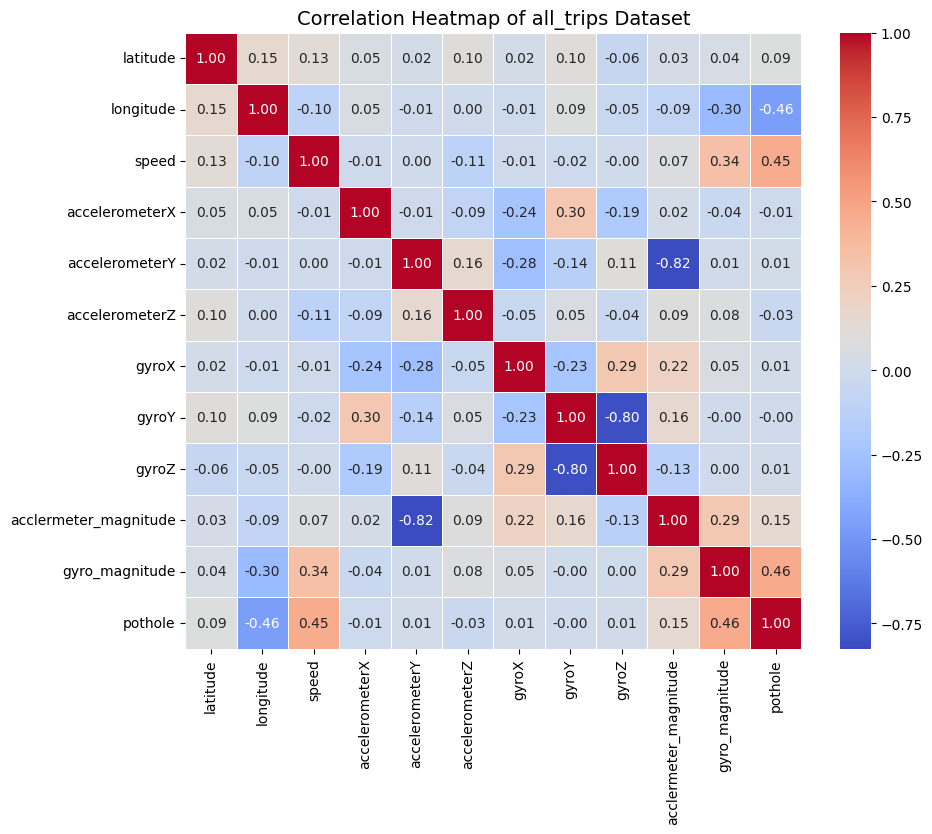

In [ ]:
# correlation heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = all_trips.corr(numeric_only=True)
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of all_trips Dataset", fontsize=14)
plt.show()

/tmp/ipython-input-390360279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pothole', y=col, data=all_trips, palette='coolwarm')
/tmp/ipython-input-390360279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pothole', y=col, data=all_trips, palette='coolwarm')
/tmp/ipython-input-390360279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pothole', y=col, data=all_trips, palette='coolwarm')
/tmp/ipython-input-390360279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

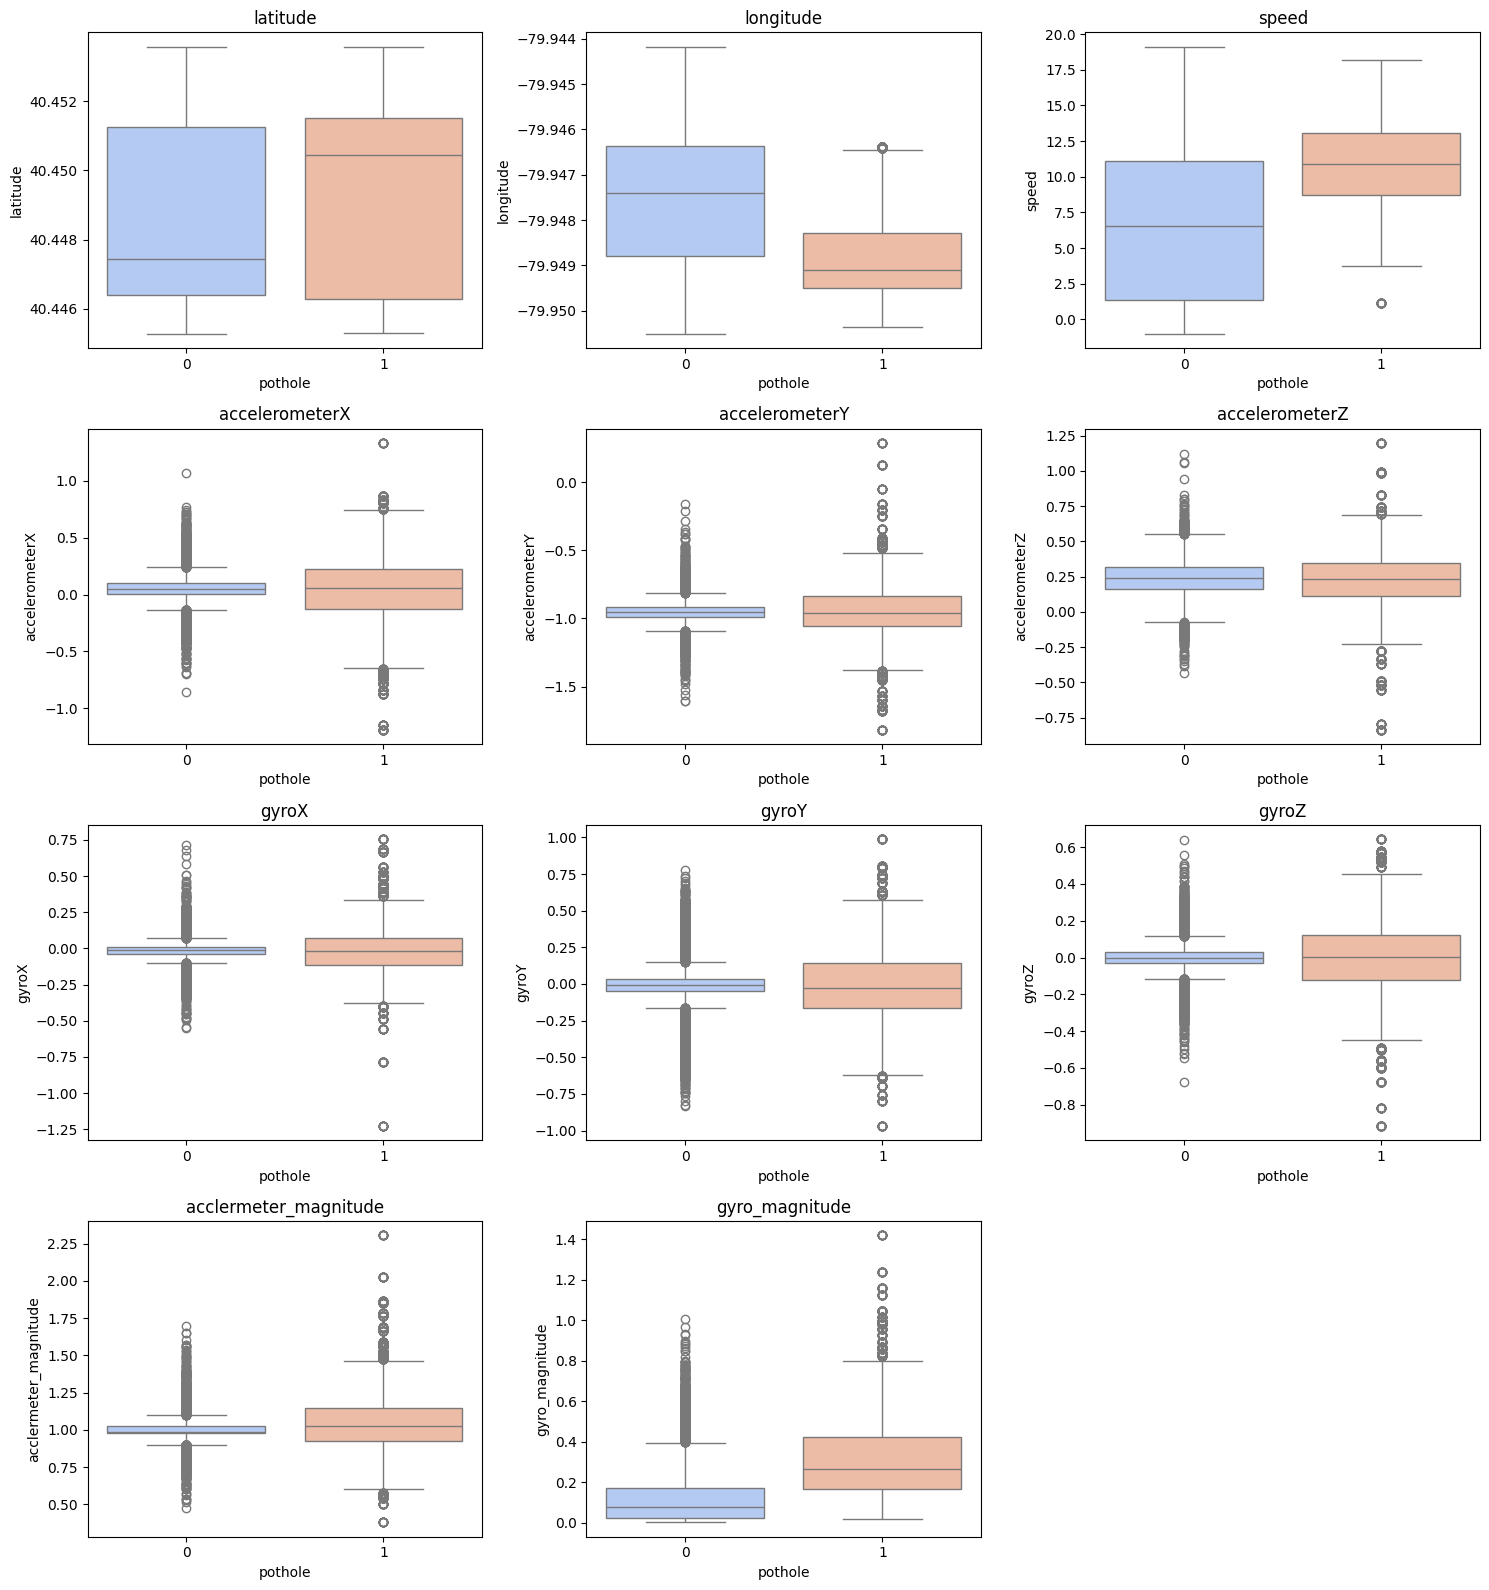

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = all_trips.select_dtypes(include=['number']).columns.drop('pothole')

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='pothole', y=col, data=all_trips, palette='coolwarm')
    plt.title(col)
plt.tight_layout()
plt.show()


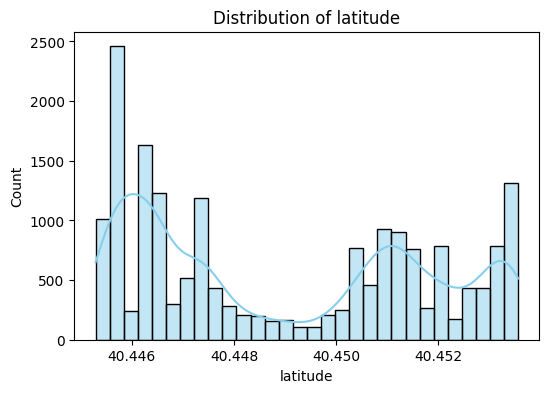

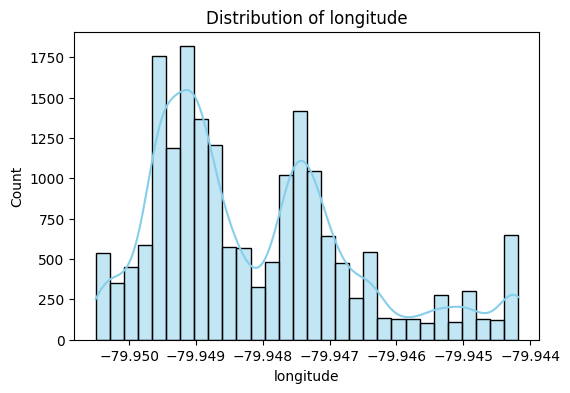

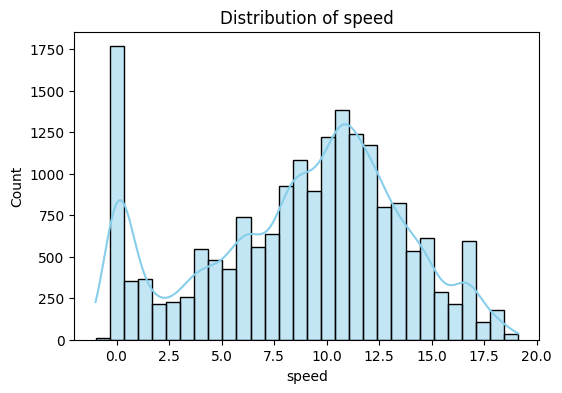

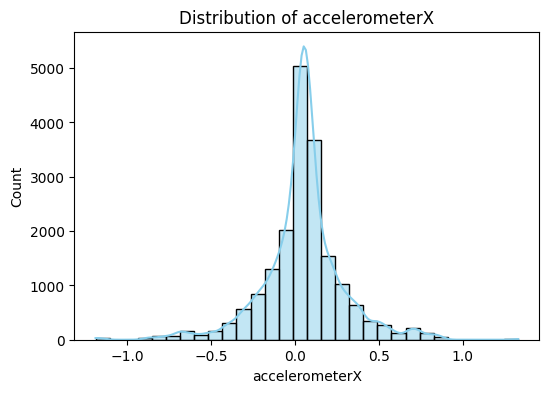

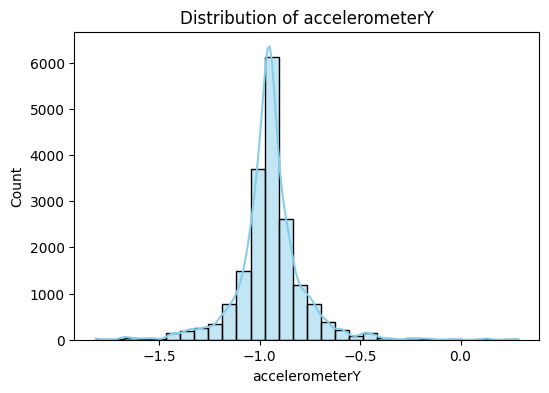

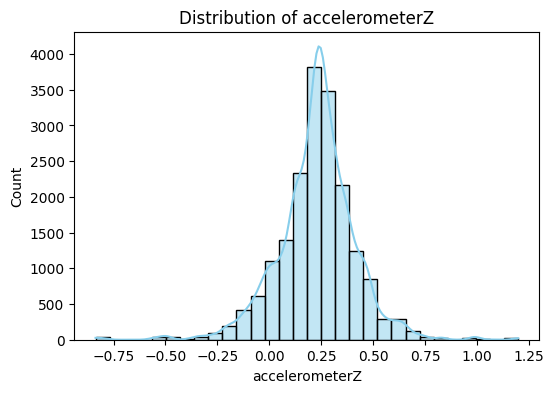

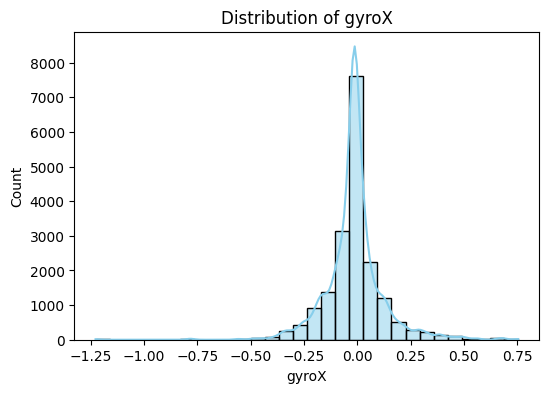

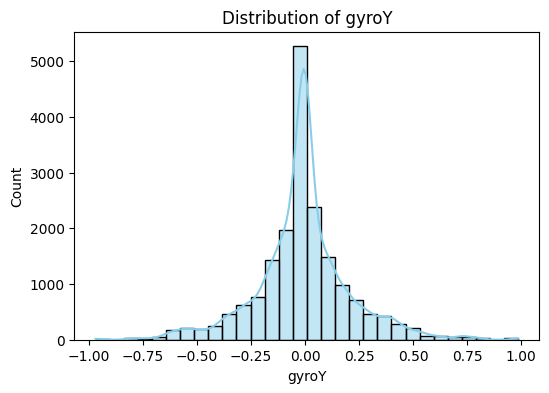

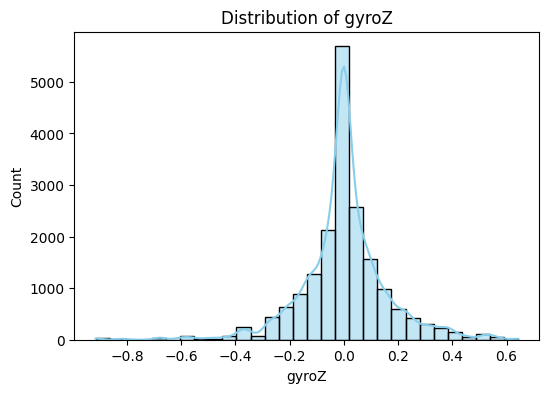

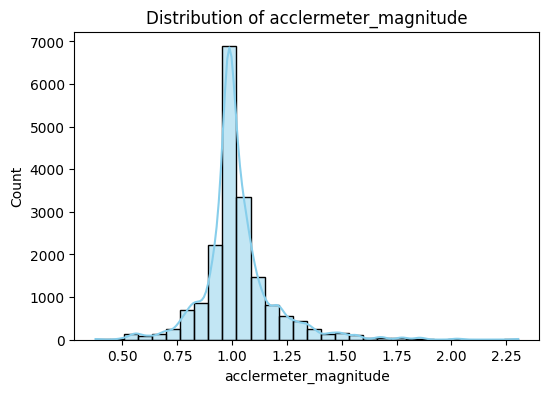

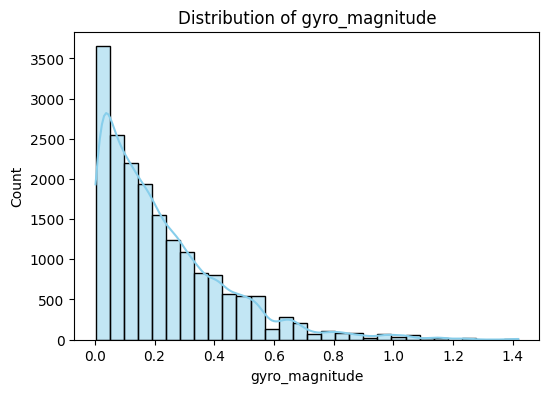

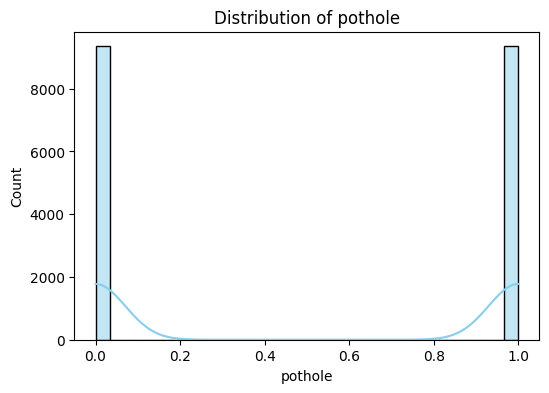

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = all_trips.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(all_trips[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
all_trips['acclermeter_magnitude'] = (all_trips['accelerometerX']**2 + all_trips['accelerometerY']**2 + all_trips['accelerometerZ']**2)**0.5
all_trips['gyro_magnitude'] = (all_trips['gyroX']**2 + all_trips['gyroY']**2 + all_trips['gyroZ']**2)**0.5

In [ ]:
all_trips.head(5)

,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ,acclermeter_magnitude,gyro_magnitude,pothole
0,40.447445,-79.944189,0.0,0.016998,-0.962234,0.203888,-0.016994,0.019259,0.007240,0.983745,0.026686,0
1,40.447445,-79.944189,0.0,0.050751,-0.962997,0.193954,-0.018083,0.004373,0.000870,0.983645,0.018625,0
2,40.447445,-79.944189,0.0,0.037415,-0.959229,0.191544,-0.014993,-0.009476,0.000937,0.978881,0.017761,0
3,40.447445,-79.944189,0.0,0.053787,-0.963852,0.277252,-0.046893,-0.001822,0.001657,1.004377,0.046958,0
4,40.447445,-79.944189,0.0,0.031647,-0.953003,0.271057,-0.007371,0.003238,-0.004349,0.991306,0.009150,0


In [ ]:
!pip install shap


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

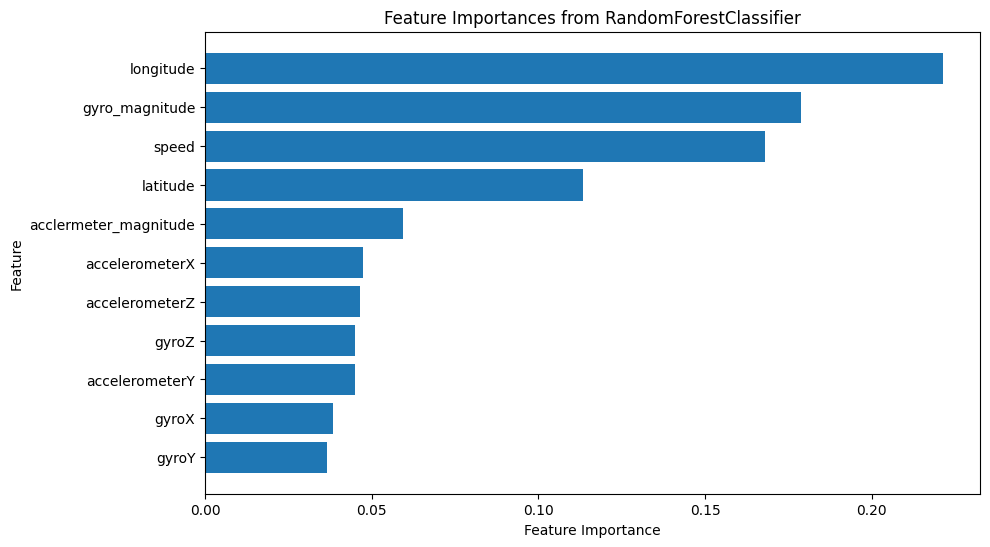

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns

feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from RandomForestClassifier")
plt.show()

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=5),
    'Logistic Regression': LogisticRegression(C=10),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Bagging Classifier': BaggingClassifier(random_state=42),
}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  Testing Accuracy: {accuracy:.4f}")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC Score: {roc_auc:.4f}")

Random Forest:
  Testing Accuracy: 0.9856
  Training Accuracy: 0.9989
  Precision: 0.9719
  Recall: 1.0000
  F1 Score: 0.9858
  ROC AUC Score: 0.9856


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  Testing Accuracy: 0.7406
  Training Accuracy: 0.7392
  Precision: 0.7432
  Recall: 0.7353
  F1 Score: 0.7392
  ROC AUC Score: 0.7406
Support Vector Machine:
  Testing Accuracy: 0.7048
  Training Accuracy: 0.7165
  Precision: 0.6530
  Recall: 0.8743
  F1 Score: 0.7476
  ROC AUC Score: 0.7048
K-Nearest Neighbors:
  Testing Accuracy: 0.9634
  Training Accuracy: 0.9701
  Precision: 0.9317
  Recall: 1.0000
  F1 Score: 0.9647
  ROC AUC Score: 0.9634
Decision Tree:
  Testing Accuracy: 0.9380
  Training Accuracy: 0.9482
  Precision: 0.8995
  Recall: 0.9861
  F1 Score: 0.9408
  ROC AUC Score: 0.9380
XGBoost:
  Testing Accuracy: 0.9866
  Training Accuracy: 1.0000
  Precision: 0.9740
  Recall: 1.0000
  F1 Score: 0.9868
  ROC AUC Score: 0.9866
[LightGBM] [Info] Number of positive: 7478, number of negative: 7478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 7478, number of negative: 7478
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 14956, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                    Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0           Random Forest        0.998997       0.988770   0.978033  1.000000   
1     Logistic Regression        0.739168       0.740642   0.743243  0.735294   
2  Support Vector Machine        0.716502       0.704813   0.652955  0.874332   
3     K-Nearest Neighbors        0.970112       0.963369   0.931739  1.000000   
4           Decision Tree        0.948181       0.937968   0.899512  0.986096   
5            

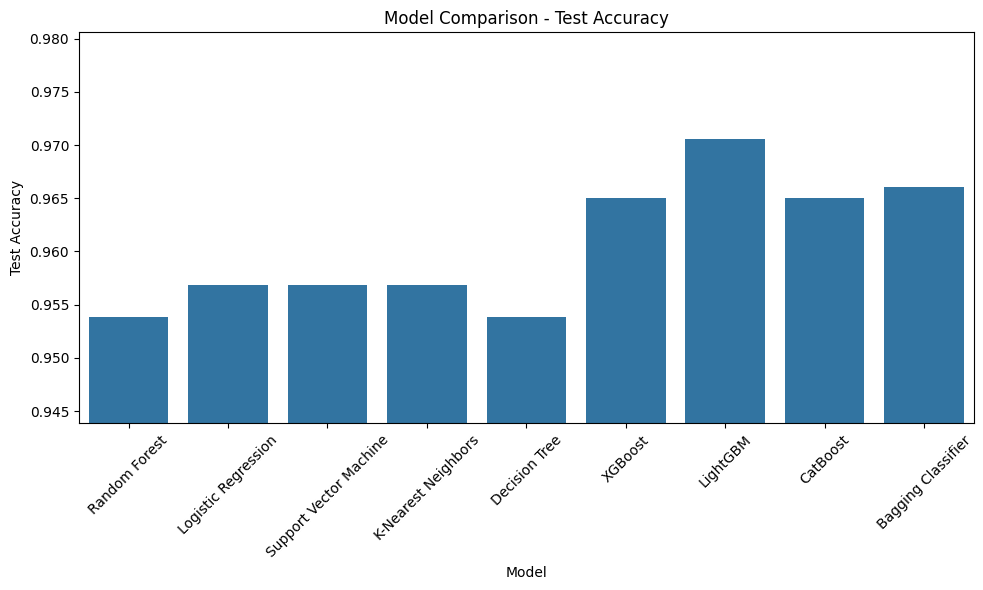

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title('Model Comparison - Test Accuracy')
plt.xticks(rotation=45)

ymin = results_df['Test Accuracy'].min() - 0.01
ymax = results_df['Test Accuracy'].max() + 0.01
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()


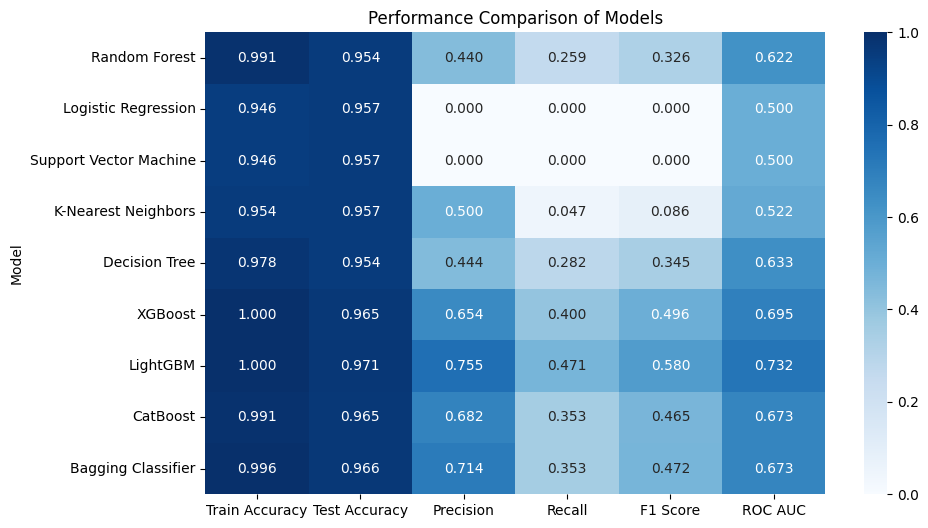

In [ ]:
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
plt.figure(figsize=(10,6))
sns.heatmap(results_df.set_index('Model')[metrics], annot=True, cmap='Blues', fmt=".3f")
plt.title('Performance Comparison of Models')
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lgb_model = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10]
}

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_lgb = grid_search.best_estimator_
y_pred = best_lgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 7478, number of negative: 7478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 14956, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50}
Best CV Score: 0.9857583581068114
Test Accuracy: 0.9911764705882353


In [ ]:
import lightgbm as lgb
light_gbm_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    max_depth=-1,
    n_estimators=200,
    num_leaves=50,
    random_state=42
)
light_gbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7478, number of negative: 7478
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 14956, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=200, num_leaves=50, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('light_gbm_model', light_gbm_model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Pipeline Test Accuracy:", accuracy)
print("Pipeline Test F1 Score:", f1)

joblib.dump(pipeline, 'pothole_detection_model_pipeline.joblib')

print("Trained pipeline saved as 'pothole_detection_model_pipeline.joblib'")

[LightGBM] [Info] Number of positive: 7478, number of negative: 7478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 14956, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Pipeline Test Accuracy: 0.990909090909091
Pipeline Test F1 Score: 0.990990990990991
Trained pipeline saved as 'pothole_detection_model_pipeline.joblib'
